In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten #tính toán
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras import utils #hàm xử lý thông tin
import tensorflow as tf
from tensorflow import keras


In [2]:
path = "Class/"
categories = ['Audi', 'hyundai', 'lexus', 'mazda', 'Mercedes', 'toyota', 'volkswagen','opel']

In [3]:
data = []       #
labels = []     #Lưu chỉ số lớp
imagePaths = [] #Lưu trữ đường dẫn ảnh và chỉ số nhãn về nó

HEIGHT = 160
WIDTH = 160

N_CHANNELS = 3 #Kênh màu

In [4]:
#Lưu đường dẫn và lớp và mảng imagePaths
for index ,name in enumerate(categories):
    for file in os.listdir(path+name):
        imagePaths.append([path+name+'/'+file, index])

#Xáo trộn dữ liệu
import random
random.shuffle(imagePaths)
print(imagePaths[:10])

#Đưa các hình ảnh về kích cỡ tiêu chuẩn
for imagePath in imagePaths:
    image = cv2.imread(imagePath[0])            #Đọc hình ảnh thông qua đường dẫn
    image = cv2.resize(image, (WIDTH, HEIGHT))  #resize hình ảnh
    data.append(image)

    labels.append( int(imagePath[1]) )               #Lưu chỉ số theo ngẫu nhiên


#Tiền xử lý dữ liệu
data = np.array(data, dtype='float')/255.0
labels = np.array(labels)

# print('Labels')
# print(labels)
# print('Data')
# print(data)

[['Class/toyota/images280_rotate_90_160.jpg', 5], ['Class/mazda/agencia-mazda-2-3-5-6-cx-3-cx-5-cx-7-cx-9-2019-2823468227.jpg', 3], ['Class/Mercedes/mercede (227).jpg', 4], ['Class/Mercedes/Mercede (871).jpg', 4], ['Class/Audi/audi (904).jpg', 0], ['Class/opel/images468.jpg', 7], ['Class/toyota/images213_rotate_180_106.jpg', 5], ['Class/Audi/audi (1401).jpg', 0], ['Class/lexus/Lexus-logo-gold_rotate_180_266.jpg', 2], ['Class/hyundai/images440_rotate_90_229.jpg', 1]]


In [5]:

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.3, random_state=42)

#Tiền xử lý các lớp
Y_train = utils.to_categorical(Y_train, num_classes=len(categories))
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(5165, 160, 160, 3)
(2214, 160, 160, 3)
(5165, 8)
(2214,)


In [6]:
EPOCH = 70  #Số lần học lại
BS = 40 #Số cụm học
INIT_LR = 1e-3

class_name = categories

In [7]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalMaxPooling2D
from keras import layers
from keras import models

mobileNet = MobileNet(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
for layer in mobileNet.layers:
    layer.trainable = False

model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(WIDTH, HEIGHT, N_CHANNELS)))
model.add(MaxPooling2D(strides=2))
model.add(Convolution2D(filters=32, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(Flatten())        #Chuyền từ 2D or 3D sang 1D
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(len(categories), activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=INIT_LR, decay=INIT_LR/EPOCH )
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

model.fit(X_train, Y_train, batch_size=BS, epochs=EPOCH, verbose=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 80, 80, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 76, 32)        25632     
                                                                 
 flatten (Flatten)           (None, 184832)            0         
                                                                 
 dense (Dense)               (None, 256)               47317248  
                                                                 
 dense_1 (Dense)             (None, 84)                21588     
                                                      

70/70 [==============================] - 1s 7ms/step


C:\Users\huynh\AppData\Local\Temp\ipykernel_18488\3350995143.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['']+ categories)
C:\Users\huynh\AppData\Local\Temp\ipykernel_18488\3350995143.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['']+ categories)


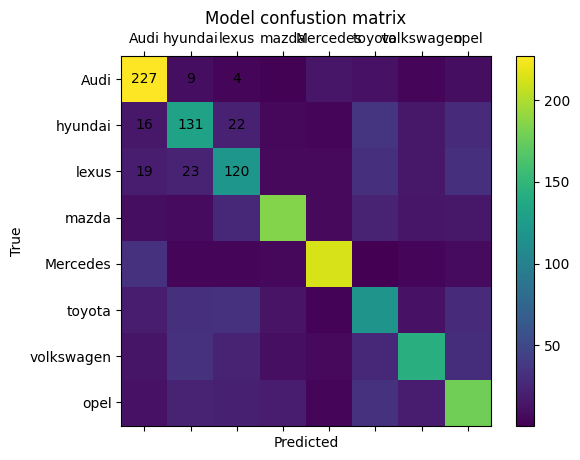

Accuracy: 59.39%


In [27]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(X_test)
predictions = argmax(pred, axis=1)

cm = confusion_matrix(Y_test, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confustion matrix')
fig.colorbar(cax)
ax.set_xticklabels(['']+ categories)
ax.set_yticklabels(['']+ categories)

for i in range(3):
  for j in range(3):
    ax.text(i,j,cm[j,i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" %(accuracy*100.0))

1/1 [==============================] - 0s 26ms/step


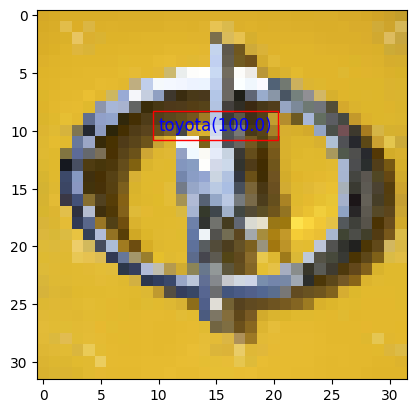

toyota 100.0


In [28]:

import PIL
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

img_path = "D:/Computer Vision/UngDungNhanDangHangXe_/Class/opel/-logo-on-a-facade-opel-ag-is-a-german-car-manufacturer-based-in-rC3A3C2BCsse_rotate_90_1.jpg"
img = image.load_img(img_path, target_size=(32,32))
img_array = image.img_to_array(img)
img_bacth = np.expand_dims(img_array, axis = 0)
img_preprocessed = preprocess_input(img_bacth)

pred = model.predict(img_preprocessed)
Res = argmax(pred,axis=1)
Result_Text = '{0}({1})'.format(categories[Res[0]], round(pred[0][Res[0]]*100,2))

plt.text(10,10, Result_Text, color="blue", fontsize="large",bbox=dict(fill=False, edgecolor='red', linewidth=1))
plt.imshow(img)
plt.show()
print(categories[Res[0]], pred[0][Res[0]]*100)